In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns
from pandas.tseries.offsets import BDay

# Supermarket Sales Analyst

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

## Dataset

- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in Dollar 
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

In [2]:
# Sumber Dataset yang digunakan
df = pd.read_csv('D:\Portfolio\Supermarket Sales\supermarket_sales - Sheet1.csv')
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.dtypes

invoice_id                  object
branch                      object
city                        object
customer_type               object
gender                      object
product_line                object
unit_price                 float64
quantity                     int64
tax_5%                     float64
total                      float64
date                        object
time                        object
payment                     object
cogs                       float64
gross_margin_percentage    float64
gross_income               float64
rating                     float64
dtype: object

In [4]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

invoice_id                         object
branch                             object
city                               object
customer_type                      object
gender                             object
product_line                       object
unit_price                        float64
quantity                            int64
tax_5%                            float64
total                             float64
date                       datetime64[ns]
time                               object
payment                            object
cogs                              float64
gross_margin_percentage           float64
gross_income                      float64
rating                            float64
dtype: object

In [5]:
df['day'] = df['date'].dt.day_name()
df['month'] = df ['date'].dt.month_name()
df['year'] = df['date'].dt.year
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating,day,month,year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,2019


In [6]:
df['month'].value_counts()

month
January     352
March       345
February    303
Name: count, dtype: int64

In [7]:
df['product_line'].value_counts()

product_line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

### Python 1

Tampilkan produk apa saja yang memiliki penjualan terbanyak setiap bulannya

In [8]:
# January Sales
data1 = pd.DataFrame(df[(df['month']=='January')]\
                        .groupby(by=['product_line'])["quantity"].sum()\
                     .sort_values(ascending=False).reset_index(name = 'qty_jan'))
print('Data Bulan Januari')
display(data1)

# February Sales
data2 = pd.DataFrame(df[(df['month']=='February')]\
                        .groupby(by=['product_line'])["quantity"].sum()\
                     .sort_values(ascending=False).reset_index(name = 'qty_feb'))
print('Data Bulan Februari')
display(data2)

# March Sales
data3 = pd.DataFrame(df[(df['month']=='March')]\
                        .groupby(by=['product_line'])["quantity"].sum()\
                     .sort_values(ascending=False).reset_index (name = 'qty_mar'))
print('Data Bulan Maret')
display(data3)

# Merge 3 table
data = data1.merge(data2, left_on = 'product_line', right_on = 'product_line')
data = data.merge(data3, left_on = 'product_line', right_on = 'product_line')
print('Data Penjualan Bulanan')
display(data)

Data Bulan Januari


,product_line,qty_jan
0,Sports and travel,375
1,Home and lifestyle,342
2,Fashion accessories,336
3,Electronic accessories,333
4,Food and beverages,325
5,Health and beauty,254


Data Bulan Februari


,product_line,qty_feb
0,Food and beverages,349
1,Electronic accessories,313
2,Fashion accessories,295
3,Health and beauty,266
4,Sports and travel,226
5,Home and lifestyle,205


Data Bulan Maret


,product_line,qty_mar
0,Home and lifestyle,364
1,Health and beauty,334
2,Electronic accessories,325
3,Sports and travel,319
4,Food and beverages,278
5,Fashion accessories,271


Data Penjualan Bulanan


,product_line,qty_jan,qty_feb,qty_mar
0,Sports and travel,375,226,319
1,Home and lifestyle,342,205,364
2,Fashion accessories,336,295,271
3,Electronic accessories,333,313,325
4,Food and beverages,325,349,278
5,Health and beauty,254,266,334


In [9]:
# Total Sales per month
total = df.groupby (by =['month'], as_index = False)['quantity'].sum().sort_values(by='quantity', ascending=False)
total

,month,quantity
1,January,1965
2,March,1891
0,February,1654


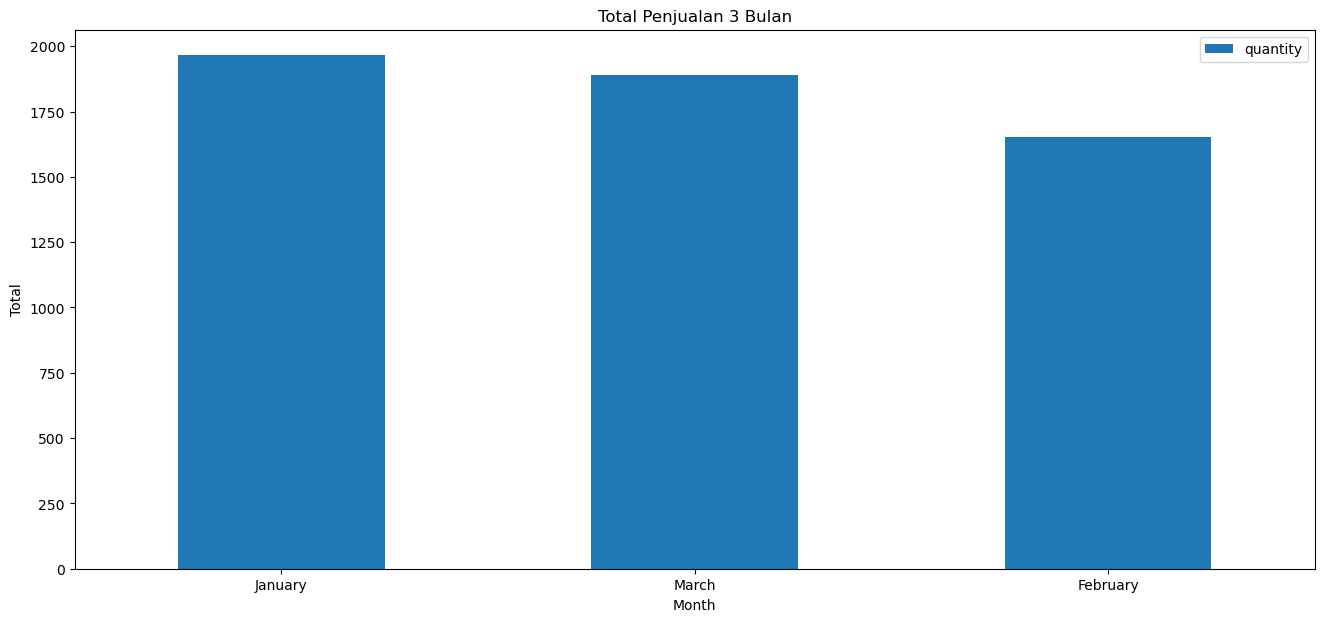

In [10]:
total.plot(x='month',
           y='quantity',
           kind='bar',
           grid = False,
           xlabel = 'Month',
           ylabel = 'Total',
           figsize=(16,7),
           rot = 0,
           table = False,
           secondary_y = False)
plt.title('Total Penjualan 3 Bulan');

In [11]:
# Total quantity per month (Before Tax) 
total_pen = df.groupby (by =['month'], as_index = False)['cogs'].sum().sort_values(by='cogs', ascending=False)
total_pen

,month,cogs
1,January,110754.16
2,March,104243.34
0,February,92589.88


<function matplotlib.pyplot.show(close=None, block=None)>

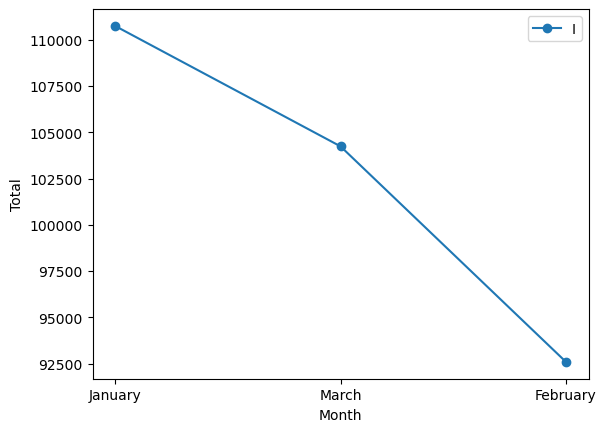

In [12]:
plt.plot(total_pen.month, total_pen.cogs, marker = 'o')
plt.legend ('Income')
plt.xlabel ('Month')
plt.ylabel ('Total')
plt.show

### Determine the rating of each branch regarding customer satisfaction

By determining and classifying each ranking number which is divided into 3, namely 
- Bad, 
- Good and 
- Very Good

In [13]:
def condition(value):
    if value >= 8:
      return 'Very Good'
    elif value >= 6:
      return 'Good'
    else:
        return 'Bad'

In [14]:
df['status'] = df['rating'].apply(condition)
df.head()

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,...,time,payment,cogs,gross_margin_percentage,gross_income,rating,day,month,year,status
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,January,2019,Very Good
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday,March,2019,Very Good
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday,March,2019,Good
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,January,2019,Very Good
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday,February,2019,Bad


In [15]:
df['status'].value_counts()

status
Good         356
Very Good    329
Bad          315
Name: count, dtype: int64

In [16]:
result = df.groupby(['city', 'status']).size().unstack().fillna(0)
result

status,Bad,Good,Very Good
city,,,
Mandalay,112,122,98
Naypyitaw,97,112,119
Yangon,106,122,112


The city listed is the city where the branch of the store is located:
- A = Yangon
- B = Mandalay
- C = Naypyitaw

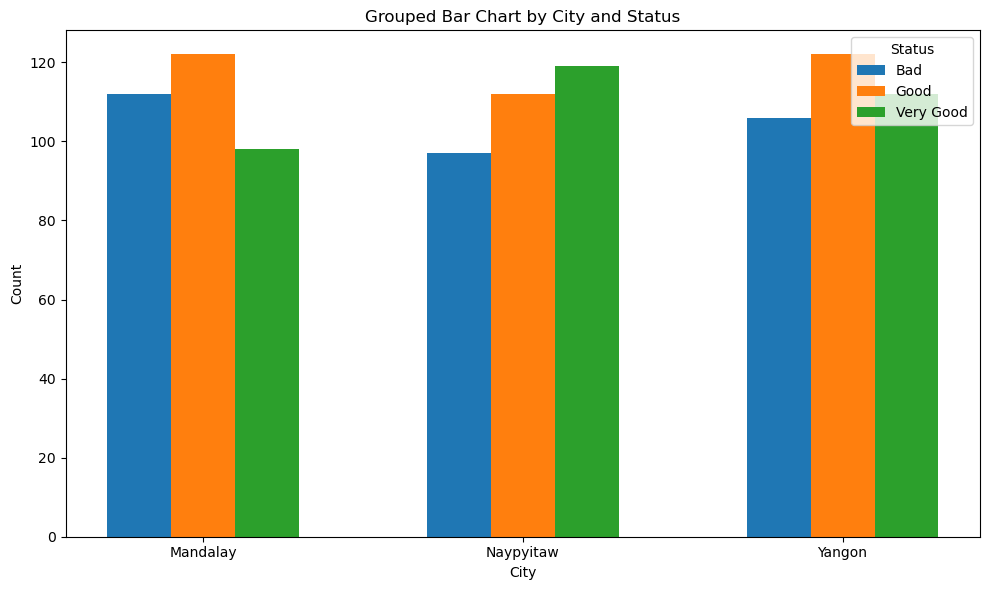

In [17]:
# Extract the cities and status from the DataFrame
cities = result.index
statuses = result.columns
n_cities = len(cities)
n_statuses = len(statuses)

# Set the width of each bar and the positions of the bars
bar_width = 0.2
index = np.arange(n_cities)  # Positions of the groups on the x-axis

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars for each status
for i, status in enumerate(statuses):
    # Offset for each status bar
    offset = i * bar_width
    ax.bar(index + offset, result[status], bar_width, label=status)

# Customize the x-axis
ax.set_xlabel('City')
ax.set_ylabel('Count')
ax.set_title('Grouped Bar Chart by City and Status')
ax.set_xticks(index + bar_width * (n_statuses / 2 - 0.5))  # Center the x-ticks
ax.set_xticklabels(cities)
ax.legend(title='Status')

# Show plot
plt.tight_layout()
plt.show()

### Calculating sales revenue

Look for sales by separating weekend and weekday income. Is there an increase in weekend income every month or vice versa?

In [18]:
weekend = pd.DataFrame (df[(df['day'].isin(['Saturday', 'Sunday']))]\
                        .groupby(by=('month'))['total'].mean().sort_values(ascending = False)\
                        .round().reset_index(name = 'avg_sales_weekend'))
weekend

,month,avg_sales_weekend
0,March,363.0
1,January,328.0
2,February,321.0


In [19]:
weekdays = pd.DataFrame (df[(df['day'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']))]\
                        .groupby(by=('month'))['total'].mean().sort_values(ascending = False)\
                        .round().reset_index(name = 'avg_sales_weekdays'))
weekdays

,month,avg_sales_weekdays
0,January,331.0
1,February,321.0
2,March,296.0


In [20]:
mergedata = weekend.merge(weekdays, left_on = 'month', right_on = 'month')
print('Rata-Rata Penjualan')
display(mergedata)

Rata-Rata Penjualan


,month,avg_sales_weekend,avg_sales_weekdays
0,March,363.0,296.0
1,January,328.0,331.0
2,February,321.0,321.0


In [21]:
mergedata ['diff_value'] = mergedata ['avg_sales_weekend'] -  mergedata ['avg_sales_weekdays']
mergedata ['diff_percent'] = round (mergedata ['diff_value'] / mergedata ['avg_sales_weekend']*100)
mergedata

,month,avg_sales_weekend,avg_sales_weekdays,diff_value,diff_percent
0,March,363.0,296.0,67.0,18.0
1,January,328.0,331.0,-3.0,-1.0
2,February,321.0,321.0,0.0,0.0


Text(0.5, 1.0, 'Comparison Oct - Dec')

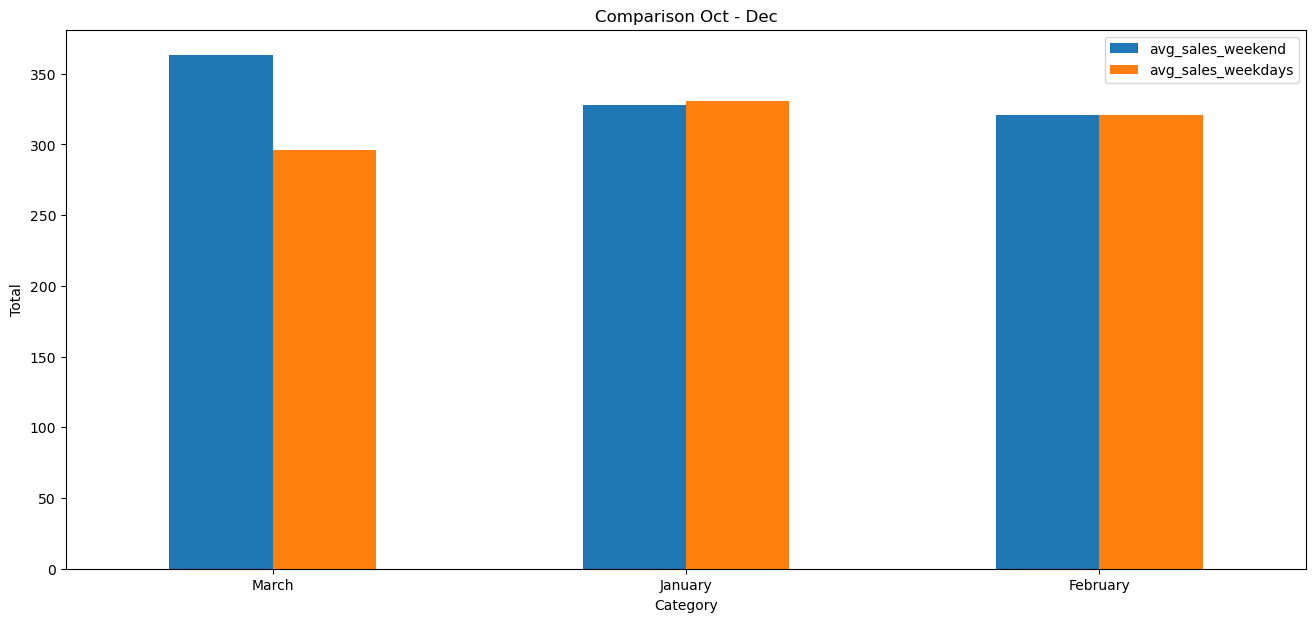

In [22]:
# Make diagram
mergedata.plot (x = 'month',
            y =['avg_sales_weekend','avg_sales_weekdays'],
            kind = 'bar',
            grid = False,
            xlabel = 'Category',
            ylabel = 'Total',
            figsize = (16,7),
            rot = 0,
            table = False,
            secondary_y= False)
plt.title('Comparison Oct - Dec')